In [2]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import cleanup

# SIFT

In [8]:
input0 = './Dataset/Resized/'
temp = ['Kitchen', 'LivingRoom']

In [4]:
cleanup.clean('SIFT')
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        img = cv2.imread(input0 + i + '/' + filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #initialise sift descriptor
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        sift_image = cv2.drawKeypoints(gray, keypoints, img)
        
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        
        #append to the csv file
        
        csv_data=out.to_csv('./Dataset/SIFT/SIFT_' + i + '.csv', mode='a', index=False)
        count += 1
    print(i + ": " + str(count))

Kitchen: 1443
LivingRoom: 698


In [3]:
data1 = pd.read_csv('./Dataset/SIFT/SIFT_Kitchen.csv', dtype='uint8')
data2 = pd.read_csv('./Dataset/SIFT/SIFT_LivingRoom.csv', dtype='uint8')

data1 = data1.astype('uint8')
data2 = data2.astype('uint8')

In [39]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 180, in where
  File "/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/numpy/core/multiarray.py", line 345, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


In [10]:
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(data1)

kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(data2)

/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
c = 0
for i in temp:
    data = []
    path_to_folder = input0+i
    print(path_to_folder)
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+'/'+fname
        img = cv2.imread(path_to_file)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)
        if i == temp[0]:
            # print("model 1")
            a=kmeans1.predict(array_double)
        elif i == temp[1]:
            # print("model 2")
            a = kmeans2.predict(array_double)

        hist=np.histogram(a,bins=6)
        data.append(hist[0])
        # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'./Dataset/SIFT/SIFT_Final_{}.csv'.format(i), mode='a', index=False)
    c += 1

In [17]:
dfp = pd.read_csv('./Dataset/SIFT/SIFT_Final_Kitchen.csv')
dfn = pd.read_csv('./Dataset/SIFT/SIFT_Final_LivingRoom.csv')

df = dfp.append(dfn)
csv_data = df.to_csv('./Dataset/SIFT/SIFT_Final')

/tmp/ipykernel_6008/171329448.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfp.append(dfn)


In [3]:
df = pd.read_csv('./Dataset/SIFT/SIFT_Final.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(x_train)
test_X = sc.transform(x_test)

Decision Tree Results
Decision Tree Accuracy:  80.65268065268066 %
Train Accuracy: 0.9824766355140186
Test Accuracy: 0.8065268065268065
Precision Score:  0.8065268065268065
Recall Score:  0.8065268065268065
F2 Score:  0.8065268065268065
F1 Score:  0.8065268065268065
Confusion Matrix: 
[[251  37]
 [ 46  95]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f17f8440100>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

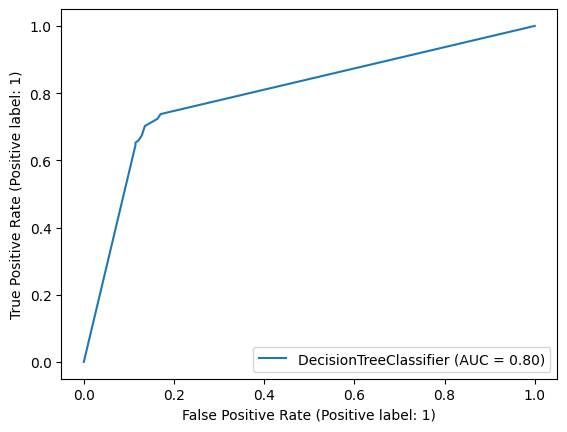

In [5]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(x_train, y_train)
joblib.dump(model_dt,"model_dt")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8484848484848485
Precision Score:  0.8484848484848485
Recall Score:  0.8484848484848485
F1 Score:  0.8484848484848486
Confusion Matrix: 
[[266  22]
 [ 43  98]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f17af1aa9b0>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

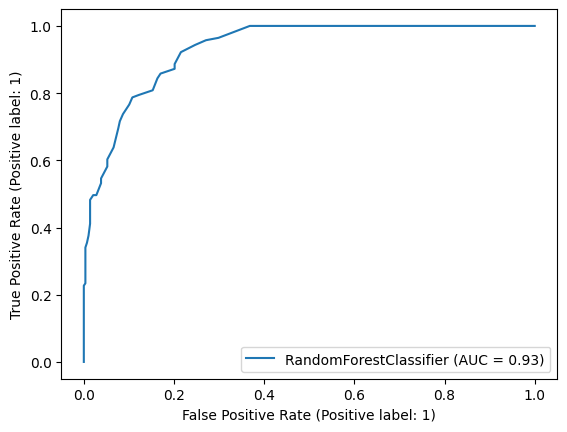

In [9]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

KNN
Train Accuracy: 0.8434579439252337
Test Accuracy: 0.7808857808857809
Precision Score:  0.7808857808857809
Recall Score:  0.7808857808857809
F1 Score:  0.7808857808857809
Confusion Matrix: 
[[247  41]
 [ 53  88]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f1792954760>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

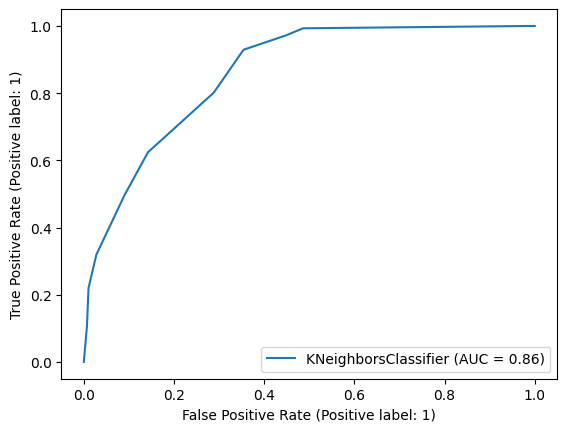

In [22]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 9)
model_knn.fit(x_train, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

LGBM
Train Accuracy: 0.9988317757009346
Test Accuracy: 0.8228438228438228
Precision Score:  0.8228438228438228
Recall Score:  0.8228438228438228
F1 Score:  0.8228438228438228
Confusion Matrix: 
[[257  31]
 [ 45  96]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f178e77e380>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

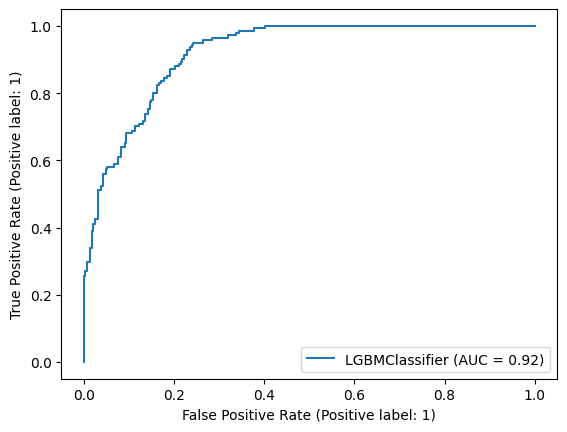

In [32]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import re
newdf = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
 
nX = newdf.iloc[:, :-1]
nY = newdf.iloc[:, -1]

# train test split
nx_train, nx_test, ny_train, ny_test = train_test_split(nX, nY, train_size=0.8, random_state=5)


model_lgbm = LGBMClassifier()
model_lgbm.fit(nx_train, ny_train)

# Predicting the Target variable
pred = model_lgbm.predict(nx_test)
print("LGBM")
print("Train Accuracy:",model_lgbm.score(nx_train, ny_train))
print("Test Accuracy:",model_lgbm.score(nx_test, ny_test))
print("Precision Score: ",metrics.precision_score(ny_test, pred, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(ny_test, pred, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(ny_test, pred, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(ny_test, pred,))
print("ROC curve ",metrics.plot_roc_curve(model_lgbm, nx_test, ny_test))

# HoG

In [9]:
temp = ['Mall', 'Supermarket']

In [11]:
cleanup.clean('HoG')

c = 0
for i in temp:
    path_to_folder = input0+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+ '/' +fname
        img = cv2.imread(path_to_file)
        cell_size = (16, 16)  # h x w in pixels
        block_size = (4, 4)  # h x w in cells
        nbins = 9  # number of orientation bins
        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                          img.shape[0] // cell_size[0] * cell_size[0]),
                                _blockSize=(block_size[1] * cell_size[1],
                                            block_size[0] * cell_size[0]),
                                _blockStride=(cell_size[1], cell_size[0]),
                                _cellSize=(cell_size[1], cell_size[0]),
                                _nbins=nbins)
        descriptor = hog.compute(img)
        out1 = pd.DataFrame(descriptor)
        csv_data = out1.to_csv(r'./Dataset/HoG/HoG_{}.csv'.format(i), mode='a', index=False)

In [3]:
data0 = pd.read_csv('./Dataset/HoG/HoG_Mall.csv')
data1 = pd.read_csv('./Dataset/HoG/HoG_Supermarket.csv')

In [ ]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [4]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(data0)

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(data1)

KMeans(n_clusters=3)

In [10]:
final = pd.DataFrame()
c = 0
for i in temp:
    data = []
    path_to_folder = input0+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+ '/' +fname
        img = cv2.imread(path_to_file)
        cell_size = (16, 16)  # h x w in pixels
        block_size = (4, 4)  # h x w in cells
        nbins = 9  # number of orientation bins
        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                          img.shape[0] // cell_size[0] * cell_size[0]),
                                _blockSize=(block_size[1] * cell_size[1],
                                            block_size[0] * cell_size[0]),
                                _blockStride=(cell_size[1], cell_size[0]),
                                _cellSize=(cell_size[1], cell_size[0]),
                                _nbins=nbins)
        descriptor = hog.compute(img)
        out1 = pd.DataFrame(descriptor)
        array_double = np.array(out1, dtype=np.double)
        if i == temp[0]:
            a=kmeans1.predict(array_double)
        elif i == temp[1]:
            a = kmeans2.predict(array_double)
        hist=np.histogram(a,bins=6)
        data.append(hist[0])
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'./Dataset/HoG/HoG_FINAL_{}.csv'.format(i), mode='a', index=False)
    c += 1


In [12]:
dfp = pd.read_csv('./Dataset/HoG/HoG_FINAL_Mall.csv')
dfn = pd.read_csv('./Dataset/HoG/HoG_FINAL_Supermarket.csv')

df = dfp.append(dfn)
csv_data = df.to_csv('./Dataset/HoG/HoG_Final.csv')

/tmp/ipykernel_15372/1612467146.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfp.append(dfn)


In [13]:
df = pd.read_csv('./Dataset/HoG/HoG_Final.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

Decision Tree Results
Decision Tree Accuracy:  100.0 %
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F2 Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[1105    0]
 [   0 1048]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f09ff0b0cd0>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

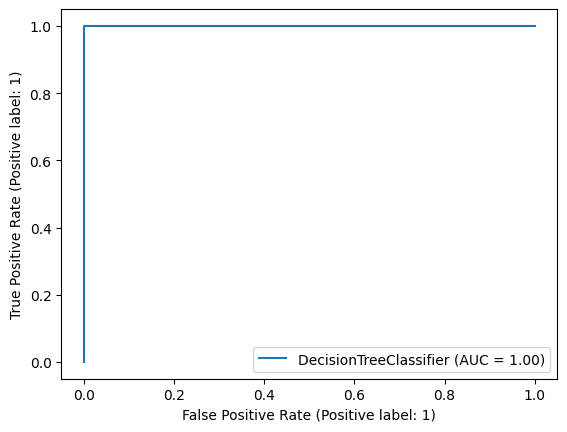

In [14]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(x_train, y_train)
joblib.dump(model_dt,"model_dt_B")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[1105    0]
 [   0 1048]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f09f691b6a0>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

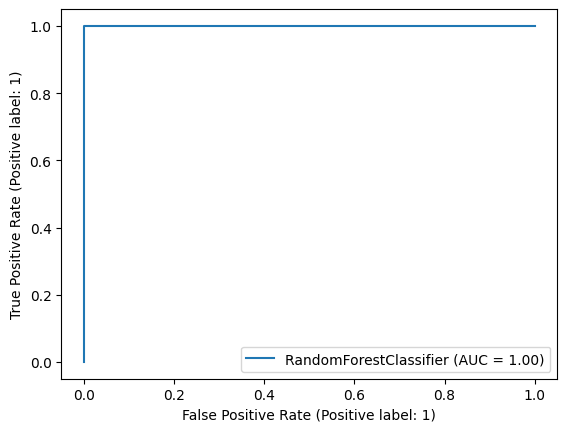

In [15]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
import joblib

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf_B")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

KNN
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[1105    0]
 [   0 1048]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f09f69ac760>


/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/sumit/miniconda3/envs/scdt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to

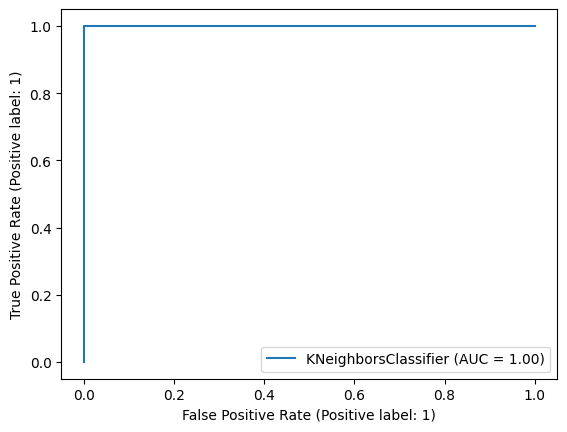

In [16]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 9)
model_knn.fit(x_train, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

# CNN

In [ ]:
temp = ['Autorickshaw', ]

In [ ]:
X = []  # the features, or inputs
Y = []  # the labels, or outputs

for i in temp:
    count = 0
    for j in os.listdir('./Dataset/Resized/' + i):
        image = load_img('./Dataset/Resized/' + i + '/' + j, target_size=(128, 128))
        input_arr = img_to_array(image)
        input_arr = np.array(input_arr)
        X.append(input_arr)
        Y.append(temp.index(i))
        count += 1
        if count == 1000:
            break

X = np.array(X)
Y = np.array(Y)